In [ ]:
!pip install kaggle

In [ ]:
kaggle = '/content/kaggle.json'

In [ ]:
!mkdir -p ~/.kaggle
!cp {kaggle} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 933MB/s]


In [ ]:
from zipfile import ZipFile
import os
file_name = 'handwritten-digits-0-9.zip'

extract_folder = 'dataset'
os.makedirs(extract_folder, exist_ok=True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall(extract_folder)
  print('Done')

Done


In [ ]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

In [ ]:
len(data_0)

2236

LOAD DATASET & BIKIN LABEL

In [ ]:
import cv2
import numpy as np

X = []
y = []

for label in range(10):
    folder_path = f'/content/dataset/{label}'
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28,28))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(21555, 28, 28)
(21555,)


PREPROCESSING

Flatten + Normalisasi

In [ ]:
X = X.reshape(X.shape[0], 28*28)
X = X / 255.0

One-Hot Encoding Label

In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, 10)

SPLIT DATA TRAIN & TEST

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

(17244, 784) (4311, 784)


BANGUN MODEL ANN (MLP)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

KOMPILASI MODEL

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

EARLY STOPPING

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

TRAINING MODEL

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.1028 - loss: 2.3895 - val_accuracy: 0.0925 - val_loss: 2.3027
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1065 - loss: 2.3020 - val_accuracy: 0.1050 - val_loss: 2.3030
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1082 - loss: 2.3018 - val_accuracy: 0.1050 - val_loss: 2.3033
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1083 - loss: 2.3014 - val_accuracy: 0.1050 - val_loss: 2.3033
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1115 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3034
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1068 - loss: 2.3020 - val_accuracy: 0.1050 - val_loss: 2.3035


EVALUASI MODEL

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1120 - loss: 2.3024
Test Accuracy: 0.1136627197265625
Test Loss: 2.3022499084472656


VISUALISASI

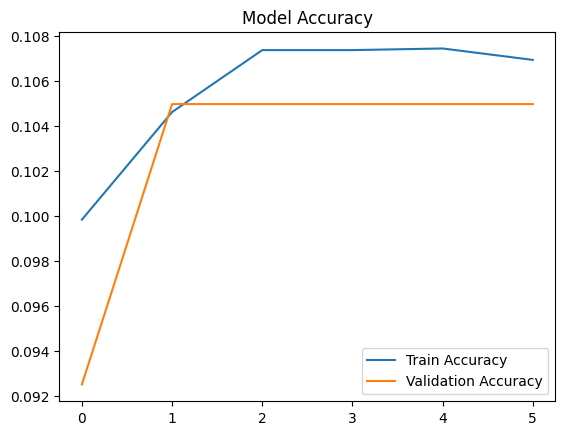

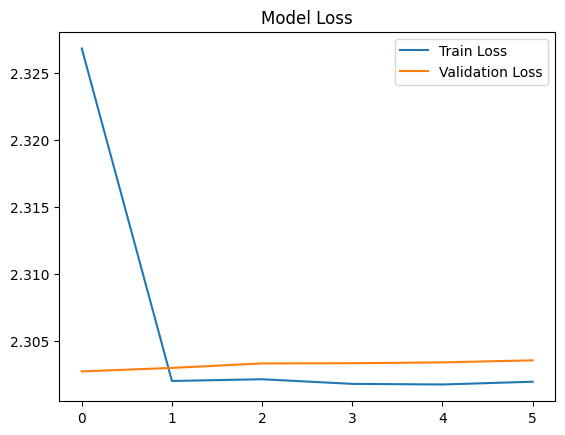

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()
